# Exploratory Analysis on Mobile Phones

Mobile telephone, also called mobile phone are portable device for connecting to a telecommunications network in order to transmit and receive voice, video, or other data. Presently technological advancements have made our life easy. Today, with the help of a mobile phone we can easily talk or video chat with anyone across the globe by just moving our fingers.


## What is Exploratory Data Analysis?

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

In this project, I have selected dataset from kaggle to explore and analyze the mobile phone dataset. We'll use the the python libraries numpy, pandas, matplotlib, seaborn, to do exploratory data analysis on the dataset.

## Importing important libraries

In this project, we'll use data analysis tools like Numpy, Pandas and visulization tools like matplotlib, seaborn.
let's install the required libraries and import them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import seaborn as sns

The special command %matplotlib inline to ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows. We are also using ploty.express for interactive visualizations.

## Downloading a dataset from an online source

You can find the raw data here : https://www.kaggle.com/datasets/devrimtuner/top-100list-of-bestselling-mobile-phones

There are several options for getting the dataset into Jupyter:

* Download the CSV manually and upload it via Jupyter's GUI.
* Use the urlretrieve function from the urllib.request to download CSV files from a raw URL.
* Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

Let's load the CSV files using the Pandas library. We'll use the name mobile_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/devrimtuner/top-100list-of-bestselling-mobile-phones')

Skipping, found downloaded files in ".\top-100list-of-bestselling-mobile-phones" (use force=True to force download)


In [3]:
mobile_df = pd.read_csv('top-100list-of-bestselling-mobile-phones\List of best-selling mobile phones.csv')
mobile_df

,Rank,Manufacturer,Model,Form factor,Smartphone?,Year,Million Units
0,1.0,Nokia,1100,Bar,No,2003,250[4][1][5]
1,2.0,Nokia,1110,Bar,No,2005,247.5[4][1][6]
2,3.0,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224[7]
3,4.0,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200[8]
4,5.0,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1[9][10][11][12]
...,...,...,...,...,...,...,...
110,111.0,LG,G2,Touchscreen,Yes,2013,3[77][78]
111,112.0,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3[79][80]
112,113.0,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1[81]
113,114.0,Palm,Centro,Keyboard bar,Yes,2007,2[82]


Here's what we can tell by looking at the dataframe :

* The file provides data of all kind of phones.
* Contains 115 Rows and 7 columns.
* The dataset contains data of top 100 mobile phones from 1996 to 2022.

## Data Preparation and Cleaning

We can view some basic information about the data frame using the .info method.

In [4]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           115 non-null    float64
 1   Manufacturer   115 non-null    object 
 2   Model          115 non-null    object 
 3   Form factor    115 non-null    object 
 4   Smartphone?    115 non-null    object 
 5   Year           115 non-null    int64  
 6   Million Units  115 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.4+ KB


In [5]:
mobile_df.nunique()

Rank             115
Manufacturer      14
Model            115
Form factor        7
Smartphone?        2
Year              23
Million Units    107
dtype: int64

The nunique() method returns the number of unique values for each column.

In [6]:
mobile_df.isnull().sum()

Rank             0
Manufacturer     0
Model            0
Form factor      0
Smartphone?      0
Year             0
Million Units    0
dtype: int64

In the entire dataset there are no null values.

## Save and upload your notebook
Whether you're running this Jupyter notebook online or on your computer, it's essential to save your work from time to time. You can continue working on a saved notebook later or share it with friends and colleagues to let them execute your code.

In [7]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/mobile-phones" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/mobile-phones


'https://jovian.ai/sayedebad-777/mobile-phones'

# Exploratory Analysis and Visualization

In [8]:
df = pd.DataFrame(mobile_df.groupby(['Manufacturer']).sum())
df['Manufacturer'] = df.index

C:\Users\sayed\AppData\Local\Temp\ipykernel_5020\933315976.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(mobile_df.groupby(['Manufacturer']).sum())


<AxesSubplot: xlabel='Manufacturer'>

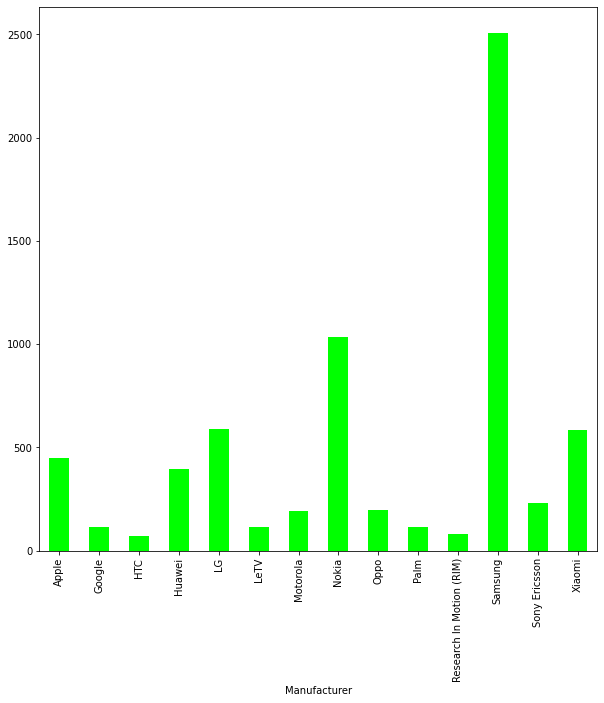

In [9]:
df["Rank"].plot(kind='bar',figsize=(10,10),color='Lime')

From the above bar graph we can see that overall samsung has the most of its product in the list of top 100 mobile phones, followed by Nokia, Apple, LG, Xiaomi these are the top five best companies in the list of top 100 selling mobile phones.

In [10]:
def pie_chart(df, colors, explode, wp):
 
    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(df['No of Mobile Phones'],
                                      autopct = lambda pct: func(pct, df['No of Mobile Phones']),
                                      labels = df['Manufacturer'],
                                      colors=colors,
                                      explode=explode,
                                      shadow = True,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, df['Manufacturer'],
              title ="Manufacturer",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title("Best Mobile Brands")

    # show plot
    plt.show()

pie_chart is a user define function which takes dataframe, colors, explode and wedge properties as arguments, it will display a beautiful pie chart displaying the information of given dataframe. 

In [11]:
df = pd.DataFrame(mobile_df['Manufacturer'].value_counts().head(10))
df.rename(columns = {'Manufacturer':'No of Mobile Phones'}, inplace = True)
df['Manufacturer'] = df.index

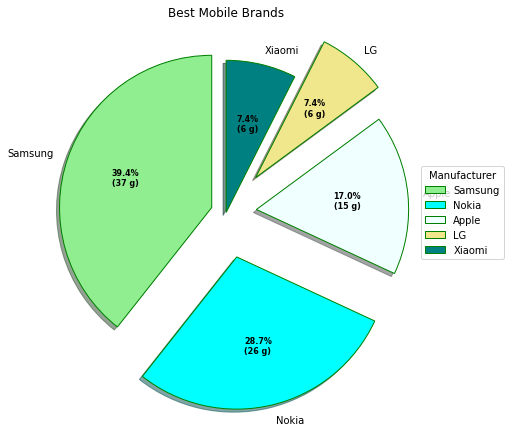

In [12]:
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
colors = ("lightgreen", "aqua", "azure", "khaki", "teal")
explode = (0.1, 0.3, 0.2, 0.3, 0.0)
pie_chart(df.head(5), colors, explode, wp)

We can see that the most no of mobile phones were sold by Samsung, 39.4% of the total products in the dataset.

## Splitting the Dataset

Let's split the dataset into one which contains only smartphones and one which do not.

In [13]:
yes_df = mobile_df[mobile_df['Smartphone?']=='Yes'].copy()
no_df = mobile_df[mobile_df['Smartphone?']=='No'].copy()

df2 = pd.DataFrame(yes_df['Manufacturer'].value_counts())
df2.rename(columns = {'Manufacturer':'No of Mobile Phones'}, inplace = True)
df2['Manufacturer'] = df2.index

df3 = pd.DataFrame(no_df['Manufacturer'].value_counts())
df3.rename(columns = {'Manufacturer':'No of Mobile Phones'}, inplace = True)
df3['Manufacturer'] = df3.index

### Best Selling Smart Mobile Phone Brand 

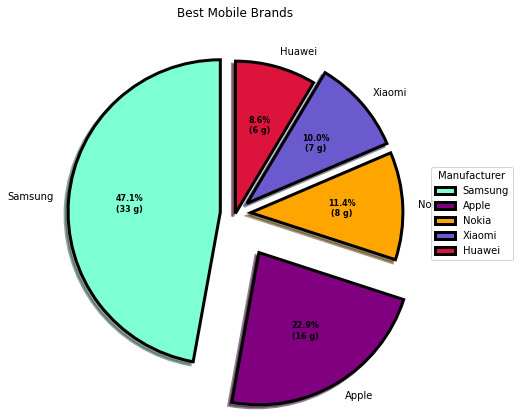

In [14]:
df2 = df2.head(5)
wp2 = { 'linewidth' : 3, 'edgecolor' : "black" }
colors2 = ("aquamarine", "purple", "orange", "slateblue", "crimson")
explode2 = (0.1, 0.3, 0.1, 0.1, 0.0)
pie_chart(df2, colors2, explode2, wp2)

Samsung is the best selling company in terms of smartphone almost 47% of the top 100 smartphone was of Samsung followed by Apple, Nokia, Xiaomi and Huawei.

### Best Selling Non-Smart Mobile Phone Brand

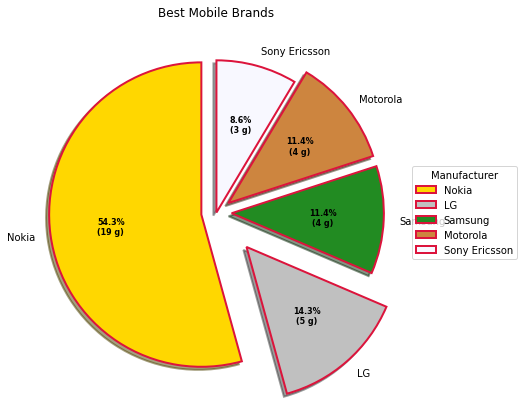

In [15]:
df3 = df3.head(5)
wp3 = { 'linewidth' : 2, 'edgecolor' : "crimson" }
colors3 = ("gold", "silver", "forestgreen", "peru", "ghostwhite")
explode3 = (0.1, 0.3, 0.1, 0.1, 0.0)

pie_chart(df3, colors3, explode3, wp3)

Nokia is the most popular brand among the non-smartphones user, more than 50% of the best phones was manufacutred by Nokia, then comse LG, then Samsung, MOtorola and Sony Ericsson.

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/mobile-phones" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/mobile-phones


'https://jovian.ai/sayedebad-777/mobile-phones'

# Asking and Answering Questions

### Q1 : Which are the top 10 popular mobile phone brands?

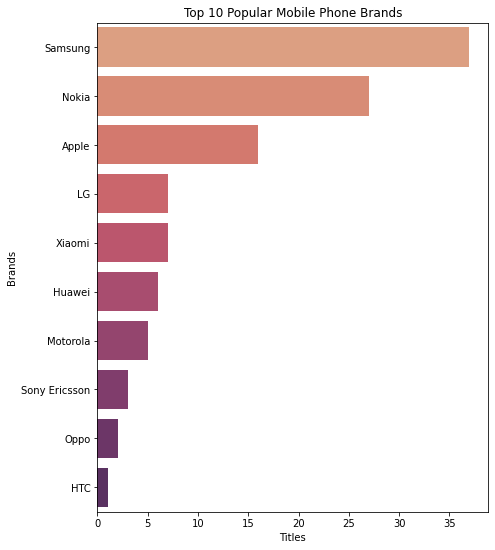

In [17]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = mobile_df['Manufacturer'], order=df['Manufacturer'].value_counts().index[:10],palette='flare')
plt.title('Top 10 Popular Mobile Phone Brands')
plt.xlabel('Titles')
plt.ylabel('Brands')
plt.show()

### Q2 : Which were the top 3 popular mobile phone brands in year 2010?

In [18]:
def year(year, color):
    yr_df = mobile_df[mobile_df['Year']==year].copy()
    yr_df = pd.DataFrame(yr_df['Manufacturer'].value_counts())
    yr_df.rename(columns = {'Manufacturer':'No of Mobile Phones'}, inplace = True)
    yr_df['Manufacturer'] = yr_df.index
    plt.title("Popular Mobile Phone Brands in %s" %year)
    
    yr_df['No of Mobile Phones'].plot(kind='bar',figsize=(10,10),color=color)

In [19]:
yr_2010 = mobile_df[mobile_df['Year']==2010].copy()
yr_2010

,Rank,Manufacturer,Model,Form factor,Smartphone?,Year,Million Units
22,23.0,Nokia,1280,Bar,No,2010,100[26]
35,36.0,Apple,iPhone 4,Touchscreen,Yes,2010,50[30]
54,55.0,Samsung,Galaxy S,Touchscreen,Yes,2010,25[41]


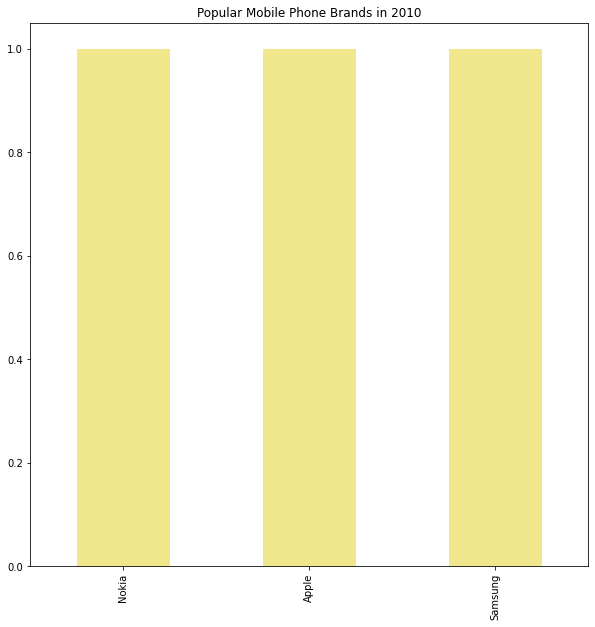

In [20]:
year(2010, "khaki")

As we can see in the year 2010 Nokia, Apple and Samsung were the popular brands, their product Nokia 1280, Apple iPhone 4 and Samsung Galaxy S out of which iPhone 4 and Galaxy S are Touchscreen; comes in the list of top 100 best selling Mobile Phones.

### Q3 : Which were the top 3 popular mobile phone brands in year 2020?

In [21]:
yr_2020 = mobile_df[mobile_df['Year']==2020].copy()
yr_2020

,Rank,Manufacturer,Model,Form factor,Smartphone?,Year,Million Units
20,21.0,Apple,"Apple iPhone 12, iPhone 12 mini, iPhone 12 Pro...",Touchscreen,Yes,2020,100[18]
52,53.0,Apple,iPhone 12 Pro Max,Touchscreen,Yes,2020,29[18]
53,54.0,Samsung,"Galaxy S20, Galaxy S20+ and Galaxy S20 Ultra",Touchscreen,Yes,2020,28[40]
57,58.0,Apple,iPhone SE (2nd generation),Touchscreen,Yes,2020,24.2[42]
64,65.0,Samsung,Galaxy A21s,Touchscreen,Yes,2020,19.4[42]
70,71.0,Samsung,Galaxy A11,Touchscreen,Yes,2020,15.3[42]
79,80.0,Xiaomi,Redmi Note 9 Pro,Touchscreen,Yes,2020,15[42]
95,96.0,Samsung,Galaxy S20 FE,Touchscreen,Yes,2020,10[70][71]


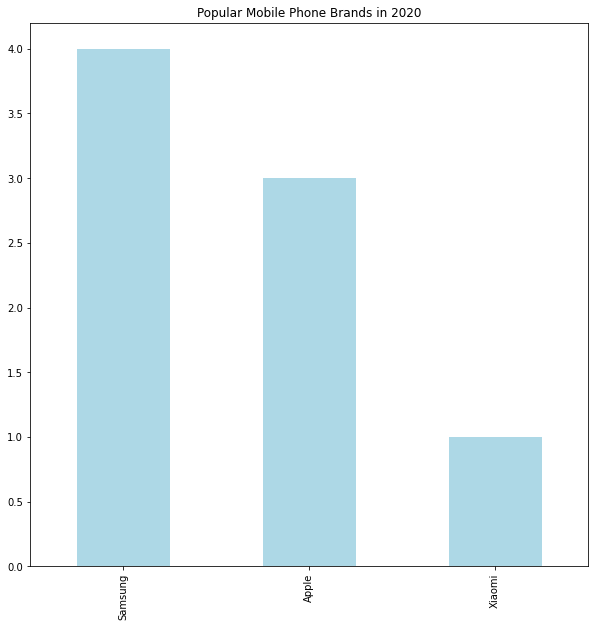

In [22]:
year(2020, 'lightblue')

In the year 2020, all the phones were touchscreen and top 3 brands were Samsung, Apple and Xiaomi. Samsung Galaxy S20 series and A21 series, Apple iPhone 12 series and SE (2nd Gen) and Xiaomi Redmi Note 9 Pro comes in the list of top 100 best selling mobile phones.

# Inferences and Conclusion
Mobile devices have come a long way, building on their traditional phone function to become general-purpose communication consoles. In further years they will be getting more advance and better. Starting way back with telephones, were invented for communication, phones played a single role : they allowed people to make calls. Thanks to the development of networks, technology, and social needs, mobile phones today let users do much more—send and receive text messages and emails, take photos and videos, access the internet, listen to music, and play games, among many other functions. Artificial Intelligence (AI) technology, steadily making its way into mobile phones and allowing for things like human-machine interaction.

# Future Work
* Which type/form of phones were famous in which year.
* Model which can tell which brand was in the hype in a particular year.
* Graphs can be more beautiful and attractive.

# References
* https://www.kaggle.com/datasets/devrimtuner/top-100list-of-bestselling-mobile-phones
* https://www.geeksforgeeks.org/
* https://matplotlib.org/stable/index.html

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sayedebad-777/mobile-phones" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/sayedebad-777/mobile-phones


'https://jovian.ai/sayedebad-777/mobile-phones'